# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#Final-edits" data-toc-modified-id="Final-edits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Final edits</a></div><div class="lev2 toc-item"><a href="#nhmmer-logic" data-toc-modified-id="nhmmer-logic-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>nhmmer logic</a></div><div class="lev2 toc-item"><a href="#nhmmer-localization" data-toc-modified-id="nhmmer-localization-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>nhmmer localization</a></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Mon Apr 30 2018 

CPython 3.6.5
IPython 6.3.1

numpy 1.14.2
scipy 1.0.1
pandas 0.22.0
sklearn 0.19.1
matplotlib 2.2.2
seaborn 0.8.1
networkx 2.1
notebook 5.4.1
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-39-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy import sparse
from scipy.stats import ttest_ind
from scipy.stats import describe

import os

### Autoimport my code

In [3]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [4]:
cd ..

/home/jessime/Code/kmers3


In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

### Plotting

In [7]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Final edits

This section is mostly going to be getting `n` values (hopefully).

In [8]:
local_df = '/home/jessime/Research/fig_data/local_df.csv'
local_df = pd.read_csv(local_df, index_col=0)
local_df.head()

Group  % Nuclear Cell Type   Method
CTD-2231E14.8-001      1   0.224587      K562  PolyA -
RP11-67K19.3-001       0   1.000000      K562  PolyA -
RP4-676J13.2-001       0   1.000000      K562  PolyA -
RP11-348J12.5-001      2   0.696120      K562  PolyA -
RP11-178L8.3-001       4   0.591600      K562  PolyA -

In [10]:
grouped = local_df.groupby(['Method', 'Group', 'Cell Type']).count()
grouped

% Nuclear
Method  Group Cell Type           
PolyA + 0     HepG2           1719
              K562            1651
        1     HepG2           1397
              K562            1289
        2     HepG2           1180
              K562            1125
        3     HepG2            775
              K562             758
        4     HepG2            561
              K562             537
        5     HepG2            685
              K562             659
PolyA - 0     HepG2           1864
              K562            1636
        1     HepG2           1285
              K562            1170
        2     HepG2           1152
              K562            1086
        3     HepG2            786
              K562             703
        4     HepG2            565
              K562             510
        5     HepG2            740
              K562             621

In [11]:
precision_recall = '/home/jessime/Research/fig_data/precision_recall.csv'
precision_recall = pd.read_csv(precision_recall, index_col=0)
precision_recall.head()

Precision    Recall Cell Type
AGGF1   0.452035  1.086957     HepG2
AUH     1.224357  3.376623     HepG2
BCCIP   2.079022  3.313840     HepG2
BUD13   0.940384  0.607903     HepG2
CDC40   0.722037  2.409639     HepG2

In [12]:
grouped = precision_recall.groupby('Cell Type').count()
grouped

Precision  Recall
Cell Type                   
HepG2             70      70
K562              86      86

> ** Figure 4c **
> * Please clarify the sample in Supplementary Table 22 used for statistics (e.g., assays, biological replicates, etc.) in the figure legend.
> * If n<10, please show the individual data points as overlays.

> ** Figure 4e **
> * Please define the sample size in the figure legend using the wording above.
> * If n<10, please show the individual data points as overlays.

In [14]:
infile = "/home/jessime/Research/tetris/tetris_data_xist3p3.csv"
tetris_df = pd.read_csv(infile, index_col=0)
xist_frag_names = ['Empty',
'Xist1.8',
'435/436 (repeat A only)',
'433/434 (repeat A delete)',
'Xist5.5',
'409/7(1.8-5.5k)',
"407/408(3'3kb)",
'Hottip']
tetris_xist = tetris_df[tetris_df.Sample.isin(xist_frag_names)].copy()
tetris_xist['Sample'] = tetris_xist['Sample'].astype('category')
tetris_xist['Sample'].cat.set_categories(xist_frag_names, inplace=True)
tetris_xist = tetris_xist.sort_values('Sample')

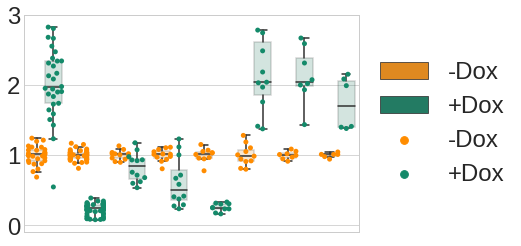

In [39]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_xist,
                 palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'}, fliersize=0, boxprops=dict(alpha=.2))
ax = sns.swarmplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_xist, color='.25',
                   palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'}, dodge=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels([])
plt.xlabel('')
plt.ylabel('')
plt.ylim([-.1, 3])
outfile = '/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/second_revisions/tetris_xist4.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

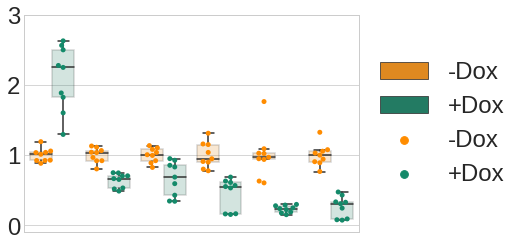

In [40]:
tetris_syn = tetris_df[(tetris_df.Sample.str.contains('SYN'))]
tetris_syn = tetris_syn.iloc[::-1]
plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_syn,
                 palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'},
                 hue_order=['-Dox', '+Dox'], fliersize=0, boxprops=dict(alpha=.2))
ax = sns.swarmplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_syn, color='.25',
                   palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'}, dodge=True,
                   hue_order=['-Dox', '+Dox'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim([-.1, 3])
outfile = '/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/second_revisions/tetris_syn5.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

Gotta add a swarm to Fig 5 too.

In [41]:
plt.rcParams['figure.figsize'] = [16.0, 4.0]
plt.rcParams['ytick.labelsize'] = 14

ordered_names = ['Empty',
'xist1.8',
'433/434 (repeat A delete)',
'435/436 (repeat A only)',
'B',
'A',
'L',
'M',
'Q',
'H',
'J',
'K',
'G',
'88/798',
'435/318',
'435/798',
'493/798',
'435/800',
'435/436RF',
'435/798 D',
'ss2 broad',
'ss3 broad',
'ss23 broad',
'ss234 broad',
'rA ss23',
'rA ss234',
'no spacer new',
'no repeats new'
]

In [42]:
luc_data = '/home/jessime/Research/tetris/luc_data5.csv'
luc_data = pd.read_csv(luc_data, index_col=0)
dox = luc_data[luc_data['Condition'] == '+Dox'].copy()
dox['Sample'] = dox['Sample'].astype('category')
dox['Sample'] = dox['Sample'].cat.set_categories(ordered_names)
dox = dox[~dox['Sample'].isin({'no U old', 'replace', 'a replace new'})]

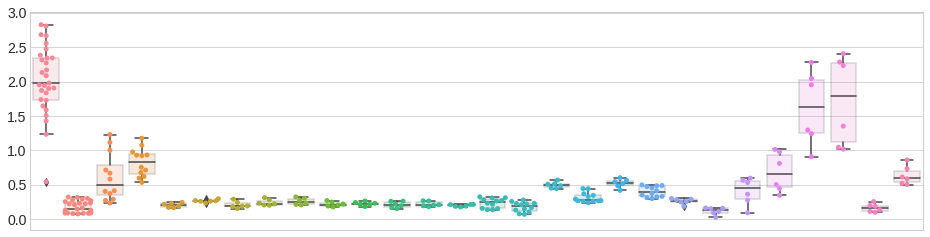

In [46]:
sns.boxplot('Sample', 'Luciferase', data=dox, boxprops=dict(alpha=.2))
sns.swarmplot('Sample', 'Luciferase', data=dox)
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
outfile = '/home/jessime/Research/pics/paper/tetris_xist_mutants4.pdf'
outfile = '/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/second_revisions/tetris_xist_mutants4.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

I've got to get p-values for all of these barplots

In [115]:
fig5_labels = ['Empty', 'Wild-type', 'ΔrA', 'Only rA', 'Δ5` (#1)',
               'ΔSS1', 'ΔHub1', 'ΔHub2', 'ΔSS2', 'ΔPK2', 'ΔSS3', 
               'ΔSS4', 'Δ3` (#1)', 'Δ3` (#2)', 'Δ5` (#2)', 'Minimal', 'Only SS2/3/4',
               'Min., ΔSS3/4', 'Δ5`, ΔSS2/3/4', 'Min., ΔSS2 br.', 'ΔSS2 br.', 'ΔSS3 br.', 'ΔSS2/3 br.',
               'ΔSS2/3/4 br.', 'ΔrA, ΔSS2/3 br.', 'ΔrA, ΔSS2/3/4 br.', 'ΔU in rA', 'ΔGC in rA']

In [116]:
control = dox[dox['Sample'] == 'xist1.8']['Luciferase'].values
p_value_df = []
for i, n in enumerate(ordered_names):
    sample = dox[dox['Sample'] == n]['Luciferase'].values
    ttest = ttest_ind(control, sample)[1]
    adj = ttest*26
    sig = True if adj < 0.05 else False
    p_value_df.append({'Sample': n,
                       'Count': len(sample),
                       'p-value': ttest,
                       'adjusted p-value': adj,
                       'Sig': sig
                      })
    
p_value_df = pd.DataFrame(p_value_df)
p_value_df = p_value_df[['Sample', 'Count', 'p-value', 'adjusted p-value', 'Sig']]
p_value_df['Sample'] = fig5_labels
outfile = '/home/jessime/Dropbox/kmer_paper/nature-submission/supp_table_23_xist_mutant_p-values.xlsx'
p_value_df.to_excel(outfile)
p_value_df

Sample  Count       p-value  adjusted p-value    Sig
0               Empty     29  2.271009e-25      5.904622e-24   True
1           Wild-type     27  1.000000e+00      2.600000e+01  False
2                 ΔrA     12  3.356489e-07      8.726871e-06   True
3             Only rA     12  1.703984e-16      4.430358e-15   True
4            Δ5` (#1)      6  4.487427e-01      1.166731e+01  False
5                ΔSS1      6  1.770166e-02      4.602431e-01  False
6               ΔHub1      6  3.723163e-01      9.680225e+00  False
7               ΔHub2      6  7.499117e-02      1.949770e+00  False
8                ΔSS2      6  2.886408e-02      7.504662e-01  False
9                ΔPK2      6  2.456648e-01      6.387285e+00  False
10               ΔSS3      6  1.748546e-01      4.546221e+00  False
11               ΔSS4      6  3.526636e-01      9.169253e+00  False
12           Δ3` (#1)      6  2.254699e-01      5.862216e+00  False
13           Δ3` (#2)      6  5.108383e-01      1.328179e+01  False
14           Δ5` (#2)     12  5.081642e-02      1.321227e+00  False
15            Minimal     12  9.427855e-01      2.451242e+01  False
16       Only SS2/3/4      6  6.862107e-10      1.784148e-08   True
17       Min., ΔSS3/4     12  1.800435e-05      4.681130e-04   True
18      Δ5`, ΔSS2/3/4      6  2.009704e-10      5.225231e-09   True
19     Min., ΔSS2 br.     12  2.523949e-09      6.562268e-08   True
20           ΔSS2 br.      6  2.647760e-02      6.884175e-01  False
21           ΔSS3 br.      6  1.186392e-01      3.084619e+00  False
22         ΔSS2/3 br.      6  8.160632e-05      2.121764e-03   True
23       ΔSS2/3/4 br.      6  4.539051e-09      1.180153e-07   True
24    ΔrA, ΔSS2/3 br.      6  9.242012e-15      2.402923e-13   True
25  ΔrA, ΔSS2/3/4 br.      6  1.166983e-13      3.034157e-12   True
26           ΔU in rA      6  7.779721e-01      2.022728e+01  False
27          ΔGC in rA      6  7.512777e-12      1.953322e-10   True

Okay, that's perfect. Now I just need to figure out where in the paper I'm going to put these values.

In [118]:
!mv /home/jessime/Dropbox/kmer_paper/nature-submission/supp_table_23_xist_mutant_p-values.xlsx \
/home/jessime/Dropbox/kmer_paper/nature_genetics_reviews/second_revisions/supp_table_23_xist_mutant_p-values.xlsx

And I need to get counts for the subcommunities

In [52]:
df = pd.read_csv('/home/jessime/Research/papers/revisions/local_comm3_subs.csv', index_col=0)
grouped = df.dropna().groupby(['Method', 'Group', 'Cell Type']).count()
grouped

% Nuclear
Method  Group Cell Type           
PolyA + 0     HepG2            358
              K562             342
        1     HepG2            240
              K562             233
        2     HepG2            221
              K562             205
        3     HepG2            195
              K562             186
        4     HepG2            207
              K562             199
PolyA - 0     HepG2            343
              K562             334
        1     HepG2            243
              K562             225
        2     HepG2            217
              K562             205
        3     HepG2            184
              K562             180
        4     HepG2            201
              K562             197

In [53]:
df = pd.read_csv('/home/jessime/Research/papers/revisions/local_comm1_subs.csv', index_col=0)
grouped = df.dropna().groupby(['Method', 'Group', 'Cell Type']).count()
grouped

Nuclear
Method  Group Cell Type         
PolyA + 0     HepG2          676
              K562           646
        1     HepG2          550
              K562           541
        2     HepG2          373
              K562           357
        3     HepG2          215
              K562           218
        4     HepG2           40
              K562            42
PolyA - 0     HepG2          780
              K562           675
        1     HepG2          583
              K562           535
        2     HepG2          406
              K562           365
        3     HepG2          231
              K562           225
        4     HepG2           47
              K562            40

In [77]:
df = pd.read_csv('/home/jessime/Research/papers/revisions/local_comm3_subs.csv', index_col=0)
grouped = df.dropna().groupby(['Method']).count()
grouped

% Nuclear  Cell Type  Group
Method                              
PolyA +       2386       2386   2386
PolyA -       2329       2329   2329

In [78]:
df = pd.read_csv('/home/jessime/Research/papers/revisions/local_comm1_subs.csv', index_col=0)
grouped = df.dropna().groupby(['Method']).count()
grouped

Cell Type  Group  Nuclear
Method                            
PolyA +       3658   3658     3658
PolyA -       3887   3887     3887

## nhmmer logic

Where are Xist and friends in the nhmmer communities?

In [69]:
!grep "DBET" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "HOTAIRM1" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "HOTTIP" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "LINC00570" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "PCAT6" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "PVT1" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "TCONS_00015940" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!echo ""
!grep "BDNF-AS" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "CDKN2B" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "KCNQ1OT1" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "SCAANT" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "XIST" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml
!grep "Nespas" -A 2 -B 2 /home/jessime/Research/networks/v22_nhmmer.gml

  [
    id 3760
    names "DBET-001"
    communities 0
  ]
  [
    id 5486
    names "HOTAIRM1-001"
    communities 0
  ]
  [
    id 5495
    names "HOTTIP-001"
    communities 0
  ]
  [
    id 1345
    names "LINC00570-001"
    communities 0
  ]
  [
    id 991
    names "PCAT6-001"
    communities 0
  ]
  [
    id 6658
    names "PVT1-001"
    communities 4
  ]
--
  [
    id 6659
    names "PVT1-201"
    communities 6
  ]

  [
    id 8085
    names "BDNF-AS-001"
    communities 3
  ]
  [
    id 6840
    names "CDKN2B-AS1-001"
    communities 0
  ]
  [
    id 7955
    names "KCNQ1OT1-001"
    communities 0
  ]
  [
    id 2549
    names "SCAANT1-001"
    communities 6
  ]
  [
    id 15732
    names "XIST-001"
    communities 1
  ]


In [70]:
!grep "communities 0" /home/jessime/Research/networks/v22_nhmmer.gml | wc -l

8331


In [71]:
%aimport kmer_counts

In [72]:
counter = kmer_counts.BasicCounter('/home/jessime/Research/v22_transcripts01.fa')
counter.get_counts()

In [73]:
%timeit -n 1 -r 1 np.corrcoef(counter.counts)

25.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
seekr = 26+15
nhmmer = 86400*3
nhmmer/seekr

6321.951219512195

I *might* need the nhmmer stuff again, so let's see if we can move it and make it smaller.

In [75]:
!mkdir /home/jessime/Research/nhmmer

In [76]:
!mv /home/jessime/Desktop/v22_align/tables/ /home/jessime/Research/nhmmer/v22_align

I also need to find a stronger justification for not using the nhmmer alignments.

In [79]:
0.05/15953

3.134206732276061e-06

In [80]:
%aimport alignment

In [87]:
%aimport network

In [83]:
v22_names = '/home/jessime/Research/v22_names01B_pk.txt'
v22_names = pickle.load(open(v22_names, 'rb'))

nhmmer = alignment.Nhmmer(handle_empty_table=True)
nhmmer.tables_dir = '/home/jessime/Research/nhmmer/v22_align/'
nhmmer.tables2sim(v22_names, True, 0.05/15953)

In [90]:
edgelist = '/home/jessime/Research/networks/v22_nhmmer_el_adjusted.tab'
gm = network.GraphMaker2(sparse.coo_matrix(nhmmer.sim), el_path=edgelist)
gm.find_main_sub()
community_labels = gm.get_partition(max_comm_n=6)
gm.save_edgelist()
graph = gm.edgelist2gml()
graph.vs['names'] = v22_names
graph.vs['communities'] = community_labels
graph.write_gml('/home/jessime/Research/networks/v22_nhmmer_adjusted.gml')


PLM(balanced,pc,turbo) detected communities in 1.7637808322906494 [s]
solution properties:
-------------------  -----------
# communities         418
min community size      1
max community size   3676
avg. community size    24.5742
modularity              0.103154
-------------------  -----------


In [91]:
!wc -l /home/jessime/Research/networks/v22_nhmmer_el.tab
!wc -l /home/jessime/Research/networks/v22_nhmmer_el_adjusted.tab

7629186 /home/jessime/Research/networks/v22_nhmmer_el.tab
6026055 /home/jessime/Research/networks/v22_nhmmer_el_adjusted.tab


Wow, that does not help as much as I would have liked...

Let's look at length of the alignments and see if we can use that as justification. I'm going to modify the `process_table` method to get the info I want.

In [126]:
def process_table(tables_dir, i, gencode, threshold=.05):
    table = os.path.join(tables_dir, f'{i}.tbl')
    table = alignment.Nhmmer(handle_empty_table=True).read_table(table)
    if table is None:
        return np.array([])
    table = table.rename(columns={0:'target name', 6: 'alifrom', 7: 'ali to', 10: 'len', 12:'E-value', 13:'score'})
    table = table[table['E-value'] <= threshold].copy()

    name_col = 'target name'
    if gencode:
        table['common_name'] = table[name_col].apply(lambda x: x.split('|')[4])
        name_col = 'common_name'
    table['norm_score'] = table['score'] / table.iloc[0]['score']
    table_max = table.sort_values('norm_score', ascending=False).drop_duplicates(name_col)
    ali_ratio = (table['ali to'] - table['alifrom']) / table['len'] 
    return ali_ratio.values

In [127]:
ratios_ls = []
tables_dir = '/home/jessime/Research/nhmmer/v22_align/'

for i in tnrange(15953):
    ratios_ls.append(process_table(tables_dir, i, True))

In [129]:
ratios = np.hstack(ratios_ls)
len(ratios)

27784810

I'm doubling up here, which isn't good. I should have made the matrix, and taken the lower left triangle or something. I'm going to be lazy and visualize this anyway.

In [131]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]

/home/jessime/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


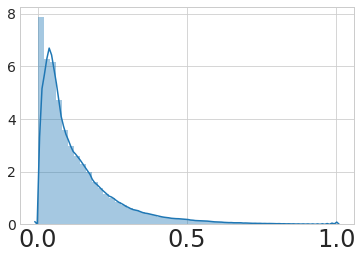

In [132]:
sns.distplot(np.abs(ratios))

In [134]:
describe(np.abs(ratios))

DescribeResult(nobs=27784810, minmax=(6.732193348592971e-05, 0.9999654326108749), mean=0.12549280039356522, variance=0.018343805702554644, skewness=2.16976760447617, kurtosis=6.324515337013636)

In [135]:
np.median(np.abs(ratios))

0.07998084291187739

## nhmmer localization

In [8]:
local = '/home/jessime/Research/fig_data/local_df.csv'
local = pd.read_csv(local, index_col=0)
print(local.shape) 
local.head()

(24454, 4)


Group  % Nuclear Cell Type   Method
CTD-2231E14.8-001      1   0.224587      K562  PolyA -
RP11-67K19.3-001       0   1.000000      K562  PolyA -
RP4-676J13.2-001       0   1.000000      K562  PolyA -
RP11-348J12.5-001      2   0.696120      K562  PolyA -
RP11-178L8.3-001       4   0.591600      K562  PolyA -

We can get the nhmmer data from the .gml file if we do some parsing.

In [9]:
!grep "names" /home/jessime/Research/networks/v22_nhmmer.gml > /home/jessime/Desktop/nhmmer_names.txt
!head /home/jessime/Desktop/nhmmer_names.txt

    names "RP11-34P13.3-001"
    names "FAM138A-001"
    names "RP11-34P13.7-001"
    names "RP11-34P13.7-201"
    names "RP11-34P13.8-001"
    names "RP11-34P13.14-001"
    names "RP11-34P13.13-001"
    names "RP11-34P13.9-001"
    names "AP006222.2-001"
    names "RP5-857K21.15-001"


In [12]:
!grep "communities" /home/jessime/Research/networks/v22_nhmmer.gml > /home/jessime/Desktop/nhmmer_comms.txt
!head /home/jessime/Desktop/nhmmer_comms.txt

    communities 2
    communities 1
    communities 1
    communities 6
    communities 1
    communities 0
    communities 3
    communities 0
    communities 1
    communities 0


In [13]:
names = '/home/jessime/Desktop/nhmmer_names.txt'
with open(names) as names:
    names = names.readlines()
names = [n.split()[1].strip('"') for n in names]
names[:5]

['RP11-34P13.3-001',
 'FAM138A-001',
 'RP11-34P13.7-001',
 'RP11-34P13.7-201',
 'RP11-34P13.8-001']

In [15]:
comms = '/home/jessime/Desktop/nhmmer_comms.txt'
with open(comms) as comms:
    comms = comms.readlines()
comms = [int(n.split()[1].strip('"')) for n in comms]
comms[:5]

[2, 1, 1, 6, 1]

In [16]:
nhmmer_comms = pd.DataFrame(data=comms, index=names, columns=['community'])
print(nhmmer_comms.shape)
nhmmer_comms.head()

(15953, 1)


community
RP11-34P13.3-001          2
FAM138A-001               1
RP11-34P13.7-001          1
RP11-34P13.7-201          6
RP11-34P13.8-001          1

In [17]:
outfile = '/home/jessime/Research/nhmmer/v22_communities.csv'
nhmmer_comms.to_csv(outfile)

In [19]:
local_nhmmer = local.join(nhmmer_comms)
local_nhmmer.head()

Group  % Nuclear Cell Type   Method  community
A1BG-AS1-001       1   0.542441      K562  PolyA -          1
A1BG-AS1-001       1   0.478910      K562  PolyA +          1
A1BG-AS1-001       1   0.874562     HepG2  PolyA -          1
A1BG-AS1-001       1   0.723989     HepG2  PolyA +          1
A2ML1-AS2-001      3   0.377949     HepG2  PolyA +          3

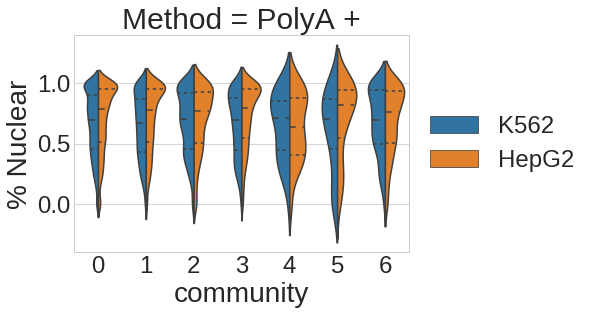

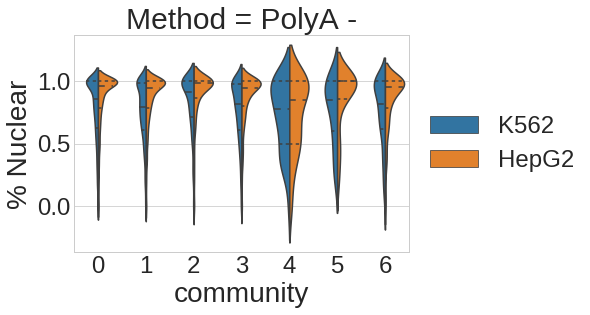

In [27]:
local_plus = local_nhmmer[local_nhmmer['Method'] == 'PolyA +']
local_minus = local_nhmmer[local_nhmmer['Method'] == 'PolyA -']

#polyA+ violin
#=============
sns.violinplot(x='community',
               y='% Nuclear',
               hue='Cell Type',
               data=local_plus,
               split=True,
               inner='quartile')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Method = PolyA +')
outfile = '/home/jessime/Research/pics/v22_nhmmer_poly+.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

# ax0.spines["top"].set_visible(False)
# #y
# ax0.spines["right"].set_visible(False)
# ax0.spines["left"].set_visible(False)
# ax0.set_ylim([-.1, 1.1])
#=====================

#polyA- violin
#=============
sns.violinplot(x='community',
               y='% Nuclear',
               hue='Cell Type',
               data=local_minus,
               split=True,
               inner='quartile')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Method = PolyA -')
outfile = '/home/jessime/Research/pics/v22_nhmmer_poly-.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [25]:
local_plus['community'].value_counts()

0    6258
1    2787
3    1704
2     962
6     457
4      88
5      80
Name: community, dtype: int64

In [26]:
local_minus['community'].value_counts()

0    6169
1    2749
3    1665
2     941
6     448
4      77
5      69
Name: community, dtype: int64